In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
# Load the dataset with pandas
earthquake_raw = pd.read_csv('earthquake_data.csv')


In [3]:
# Describe the dataset
print(earthquake_raw.describe())

           latitude     longitude         depth           mag          nst  \
count  10335.000000  10335.000000  10335.000000  10334.000000  8847.000000   
mean      37.478979   -110.241898     19.741614      1.593724    23.774839   
std       18.566369     63.654904     48.901498      1.305618    22.035451   
min      -62.969400   -179.996400     -3.730000     -1.170000     0.000000   
25%       33.196750   -150.113850      3.180000      0.750000     9.500000   
50%       38.245167   -119.948400      7.680000      1.300000    17.000000   
75%       46.867417   -110.808000     14.065000      2.030000    31.000000   
max       81.347900    179.975200    638.038000      7.600000   269.000000   

               gap         dmin           rms  horizontalError    depthError  \
count  8847.000000  6856.000000  10335.000000      7862.000000  10334.000000   
mean    118.546751     0.941792      0.260710         1.793784      2.337288   
std      63.165746     3.086871      0.263019         3.2

Text(0.5, 1.0, 'Quick Reference to Column Topics')

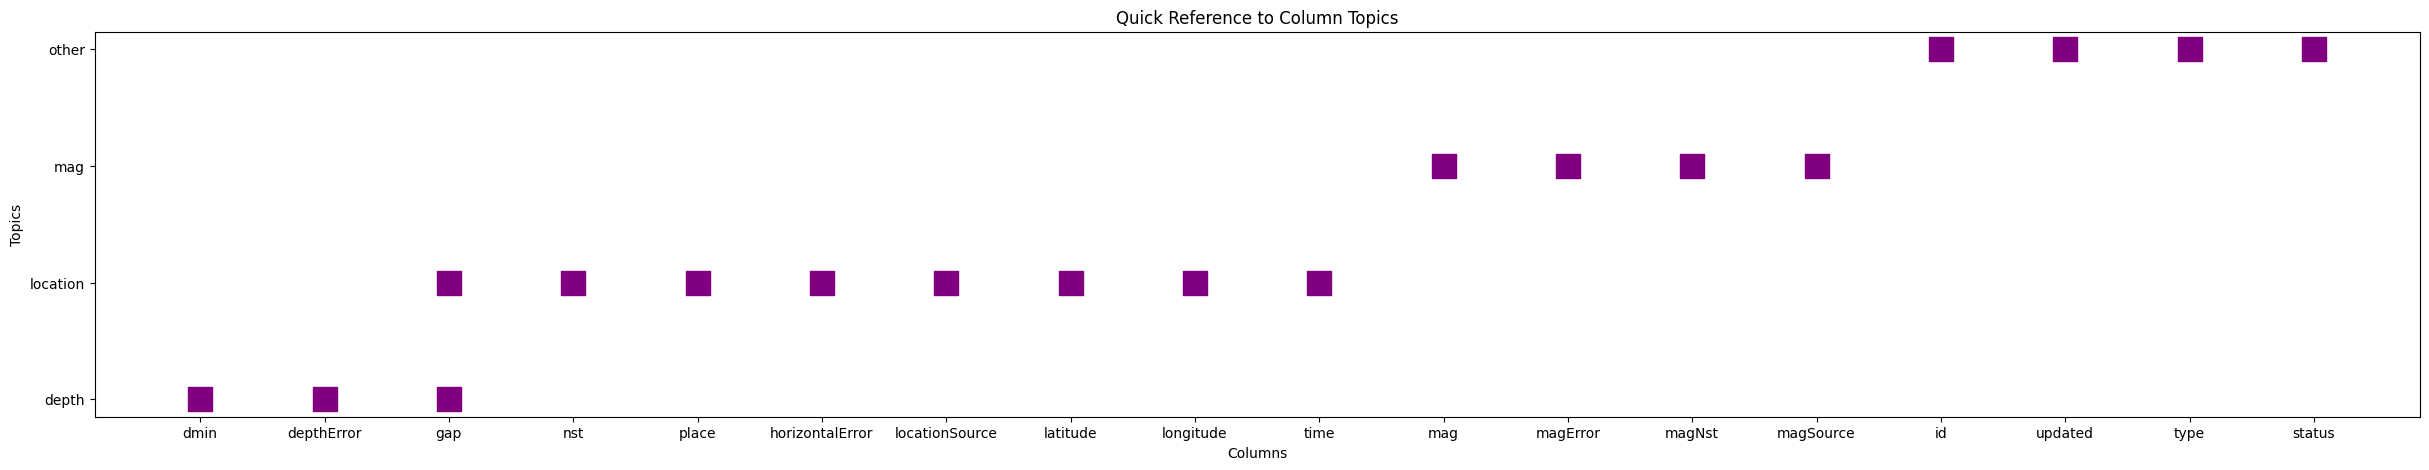

In [4]:

#-----------------------------
# Creating a quick reference chart for the column names and their topics 
# from 'column_notes.csv' which I created for the purposes described in the presentation file. 
#-----------------------------

# This attempt used matplotlib but in the next cell I decided to try seaborn and I was more pleased with the results

column_notes = pd.read_csv('column_notes.csv')
#list all columnNames grouped by topics
column_notes[column_notes['topics']=='location']
column_notes[['topics','columnNames','outlierReferences']].sort_values(by=['topics'])
xx = pd.array(column_notes['columnNames'])
yy = pd.array(column_notes['topics'])
plt.figure(figsize=(30,5))
plt.scatter(xx,yy,marker='s',s=300,c='purple')
plt.xlabel('Columns')
plt.ylabel('Topics')
plt.title('Quick Reference to Column Topics')





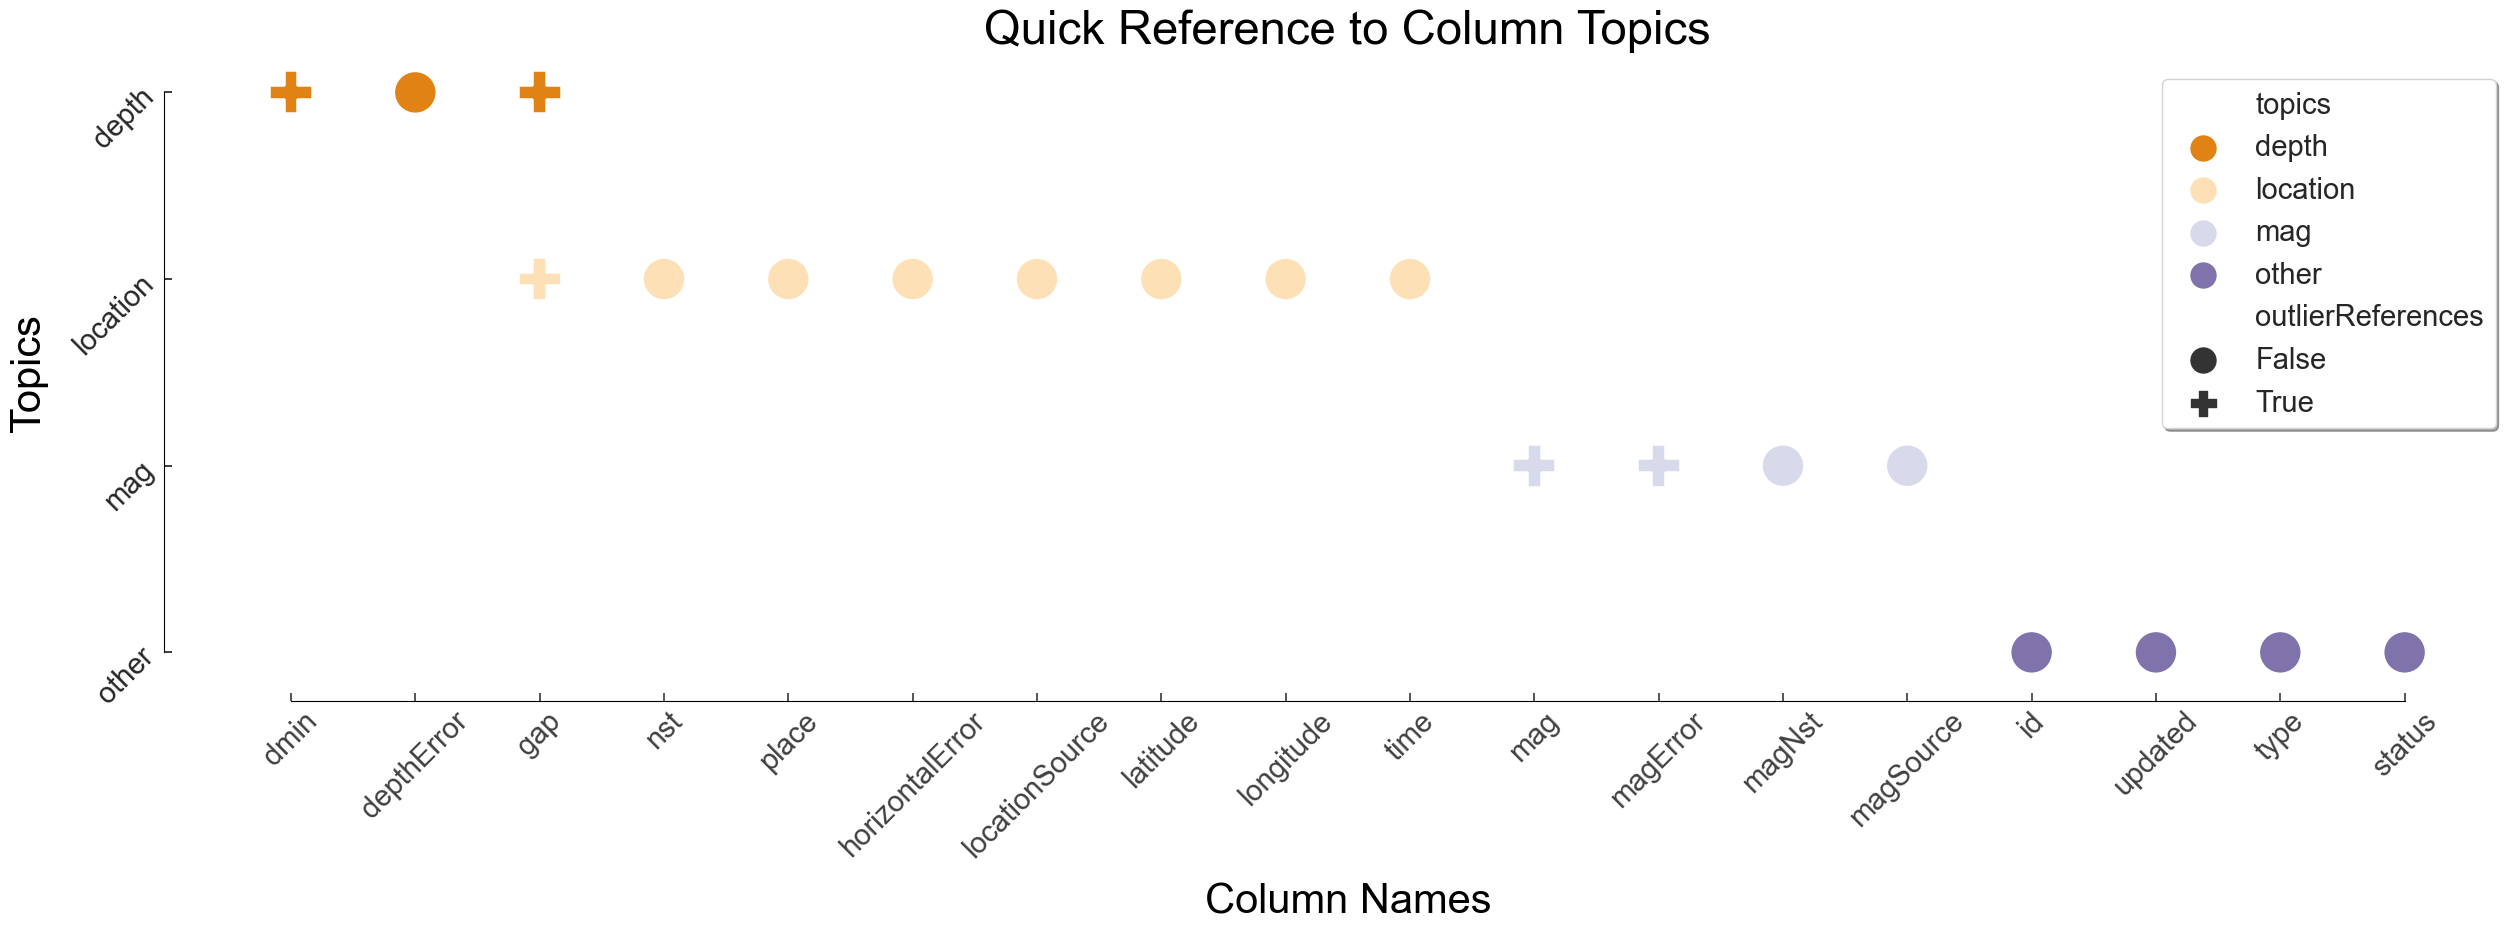

In [5]:
from matplotlib.pyplot import title


# this is a better version of the chart above

fig, ct = plt.subplots(figsize=(30,8))


# change the marker shapes
tf_markers = {True:'P',False:'o'}

# create a scatter plot
ct = sns.scatterplot(data=column_notes, x='columnNames', y='topics', hue='topics', s=1000, palette='PuOr',style='outlierReferences', markers=tf_markers, legend=True)

# setting label text and font sizes 
ct.set_ylabel('Topics',labelpad=15, fontsize=30)
ct.set_xlabel('Column Names',labelpad=15, fontsize=30)
ct.set_title('Quick Reference to Column Topics', pad=15, fontsize=34)
ct.tick_params(labelsize=21, rotation=45)
#sns.set_theme()

# set style and context 
sns.set_context('notebook')
# this style has trickled down to some of my other plots which is good to know for future reference
sns.set_style( "ticks",{'axes.grid' : True,'xtick.direction': 'in','ytick.direction': 'in', 'grid.linestyle': ':', 'xtick.color': '.25'})

# change the legend settings
plt.legend( fontsize=21, shadow=True, facecolor='white', edgecolor='lightgrey', markerscale=3)

# remove the top and right spines, raise the y spine up by 15 and trim the difference
sns.despine(offset=15, trim=True)

# the last thing that I have been unable to do is influence the two legend title names and font size. I have tried the following:
# the two topics that are automatically provided I cant seem to edit. The matplotlib methods dont seem to effect them eithor. 

In [6]:
#-------------------------------------------
# Data Cleaning 'earthquake dataset'
#-------------------------------------------
# group by 'type' to see unique values
# I chose the id column because every row should have a unique id so that 
# would give me an acurate count of the number of rows in each group
earthquake_raw.groupby('type').count()['id'] 

# conclusion: choosing earthquakes to study I should remove all the other rows from the dataset
 
earthquake_iso = earthquake_raw[earthquake_raw['type'] == 'earthquake']

# check to see if the rows were removed
earthquake_iso.groupby('type').count()['id'] 

# conclusion: earthquake_iso is the new dataset that only includes earthquakes


type
earthquake    10145
Name: id, dtype: int64

In [7]:
#-------------------------------------------
# New Data Exploration
#-------------------------------------------
earthquake_iso.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,10145.000000,10145.000000,10145.000000,10144.000000,8661.000000,8661.000000,6670.000000,10145.000000,7705.000000,10144.000000,8365.000000,8653.000000
mean,37.434758,-110.119316,20.120326,1.597582,23.866528,118.314526,0.964100,0.260649,1.807118,1.899384,0.276746,15.223391
std,18.715815,64.228604,49.278179,1.316655,22.170439,63.044366,3.126601,0.264173,3.224995,6.838656,0.519639,28.406674
min,-62.969400,-179.996400,-3.730000,-1.170000,0.000000,11.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000
25%,33.183333,-150.463000,3.490000,0.730000,10.000000,71.000000,0.027580,0.100000,0.280000,0.480000,0.106000,4.000000
50%,38.316700,-119.994500,7.810000,1.300000,17.000000,101.000000,0.062984,0.150000,0.470000,0.790000,0.167000,7.000000
75%,46.888167,-110.807167,14.300000,2.050000,31.000000,155.000000,0.159875,0.330000,0.970000,1.540158,0.250000,16.000000
max,81.347900,179.975200,638.038000,7.600000,269.000000,350.000000,40.850000,2.470000,22.250000,431.600000,5.520000,645.000000


In [8]:
#-------------------------------------------
# Further cleaning by gap data
#-------------------------------------------
# for location and depth explorations I should remove gap values of larger than 180 degrees
# as according to the documentation the gap values larger that 180 degrees, represent 
# location and depth data that has large uncertainties. The smaller the number the more accurate. 
# lets remove those and then see the rest in a scatter plot. 

earthquake_gap_iso = earthquake_iso[earthquake_iso['gap'] < 180]


locationSource
av     398
ci    1375
hv     949
nc    1460
nm      24
nn     424
ok     337
pr      97
se      10
tx     208
us    1158
uu     450
uw     224
Name: gap, dtype: int64

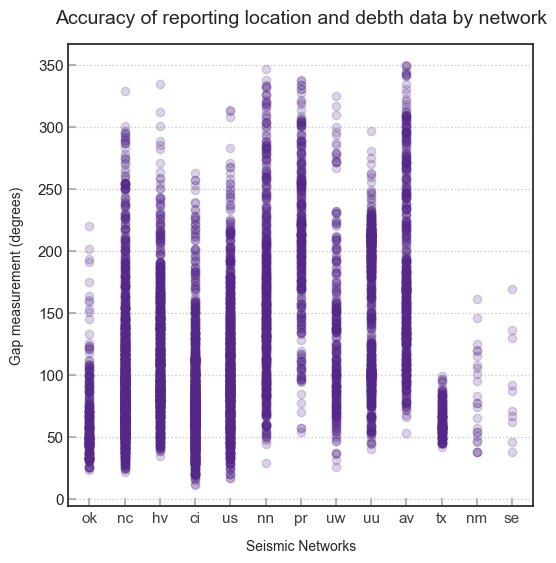

In [9]:
#-------------------------------------------
# Comparison of gap measurements to seismic networks
#-------------------------------------------

# the point of this comparison was to see if there are any networks that 
# are consistantly providing an inaccurate location (horizontal) and depth data

fig, gs = plt.subplots(figsize=(6,6))

# plot the gap data in a scatter plot
gs = plt.scatter(earthquake_iso['locationSource'], earthquake_iso['gap'],c='#542788', marker='o', alpha=0.2)
# add a title
plt.title('Accuracy of reporting location and debth data by network', pad =15, fontsize=14)
plt.xlabel('Seismic Networks', labelpad=10, fontsize=10)
plt.ylabel('Gap measurement (degrees)',labelpad=10, fontsize=10)


plt.grid(axis='y', linestyle=':', )
plt.grid(False, axis='x')

plt.tick_params('both', color='darkgrey')

# group by location source to see unique values
earthquake_gap_iso.groupby('locationSource').count()['gap']

/var/folders/x7/4frtg_jx34g69lycmb25nq5m0000gn/T/ipykernel_69135/1969246851.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  earthquake_gap.groupby('locationSource').median()['gap'].sort_values(ascending=False)


locationSource
pr    145.00
av    135.00
nn    129.07
uw    102.50
hv    102.00
uu    101.00
us     96.00
nc     82.00
se     79.00
nm     77.00
ci     71.00
tx     61.00
ok     56.00
Name: gap, dtype: float64

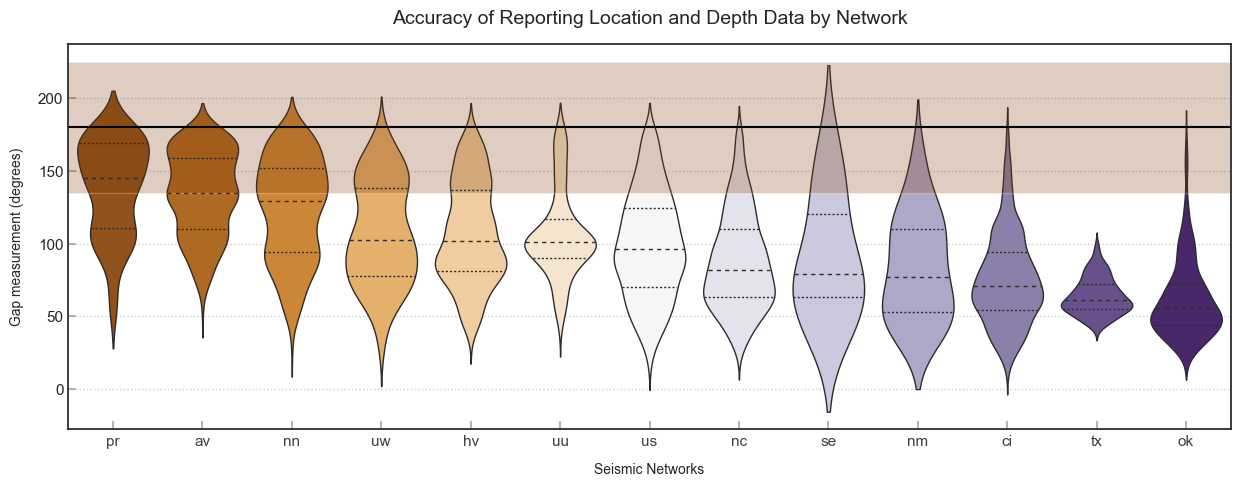

In [14]:
#-------------------------------------------
# creating a more informative version of the chart above
# this chart now shows the volume of entries per gap measurment per network
#-------------------------------------------

# remove any rows containing 'ak' in location source column
# this is because I noticed that the ak network had no data
earthquake_gap = earthquake_gap_iso[(earthquake_gap_iso['locationSource'] != 'ak')]


plt.figure(figsize=(15,5))


ldn = sns.violinplot(x='locationSource', y='gap', data=earthquake_gap, palette='PuOr',  inner='quartile', linewidth=1, scale='width', order= ['pr','av','nn', 'uw', 'hv','uu','us','nc','se','nm','ci','tx','ok'] )

# plot a horizontal line at 180 degrees
plt.axhline(y=180, color='black', linestyle='-')

# draw a transparent orange rectangle above and below 180 degrees by 25%
ldn.axhspan(180*.75, (180*.25)+180, facecolor='#7f3b07', alpha=0.25)

# adding labels and title
ldn.set_title('Accuracy of Reporting Location and Depth Data by Network', pad=15, fontsize=14)
ldn.set_xlabel('Seismic Networks', labelpad=10, fontsize=10)
ldn.set_ylabel('Gap measurement (degrees)',labelpad=10, fontsize=10)
plt.tick_params('both', color='darkgrey')

# show the median values for each network and sort in decending order
# Use this to write out the order of networks in the graph
earthquake_gap.groupby('locationSource').median()['gap'].sort_values(ascending=False)



In [11]:
#-------------------------------------------
# Lets look at magnitude data and clean
#-------------------------------------------

# I am interested in the earthquake magnitude data so I wanted to look into this next

earthquake_gap_iso["mag"].describe()

# typical mag values are between [-1, 10] so lets remove the outliers
# I can see the min value is -1.17 so there are outliers below that
# but the max value is 7.6 which is under 10 so there are no outliers above that

earthquake_mag_iso = earthquake_gap_iso[earthquake_gap_iso['mag'] > -1]

# lets also check for any empty cells in the mag column
# the result is zero so we have complete data 

earthquake_mag_iso['mag'].isnull().sum()

# Lets also use the magError column to remove any outliers
# Typical values are between [0, 100] so lets remove any values outside of that range

earthquake_mag_iso = earthquake_mag_iso[earthquake_mag_iso['magError'] <= 100]
earthquake_mag_iso = earthquake_mag_iso[earthquake_mag_iso['magError'] >= 0]

# lets also remove any values that == 'unknown' which means the data was not provided

earthquake_mag_iso = earthquake_mag_iso[earthquake_mag_iso['magError'] != 'unknown']

# lets analyse the magError column
# there are no empty cells

earthquake_mag_iso['magError'].isnull().sum()

# there are 6838 rows in the dataset still
# the range of magError values remaining are between 0 and 5.52 out of 100 
# the higher the value the more inaccurate the result so im confident the remaining mag values are pretty accurate

earthquake_mag_iso['magError'].describe()


count    6838.000000
mean        0.274925
std         0.535434
min         0.000000
25%         0.105654
50%         0.163000
75%         0.239314
max         5.520000
Name: magError, dtype: float64

[None]

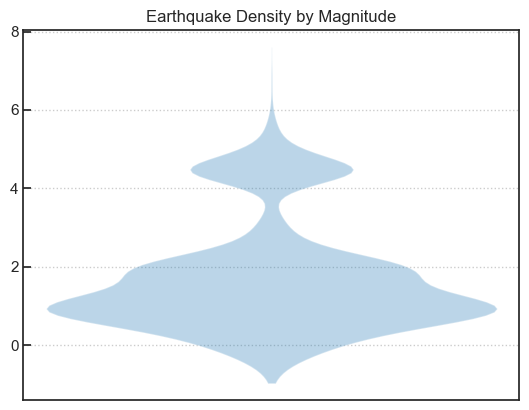

In [12]:
# -------------------------------------------
# Graph showing density of earthquakes by magnitude
# -------------------------------------------

# this is the first run through but I added more detail to the graph below this cell

# create a new column that counts the number of earthquakes in each magnitude
earthquake_mag_iso['magCount'] = earthquake_mag_iso.groupby('mag')['mag'].transform('count')


# lets count the unique values in the mag column
earthquake_mag_iso.groupby('mag').count()['magCount']


# lets create a graph showing the density of earthquakes by magnitude
plt.violinplot(earthquake_mag_iso['mag'], showmeans=False, showmedians=False, showextrema=False)

# remove the x axis label
plt.xlabel('')

# remove the x axis numbers
plt.xticks([])

# add a title
plt.title('Earthquake Density by Magnitude')

# change the colour of the violin plot
plt.setp(plt.gca(), 'facecolor', 'white')







([<matplotlib.axis.YTick at 0x126cdcb80>,
 [Text(1, -1, '−1'),
  Text(1, 0, '0'),
  Text(1, 1, '1'),
  Text(1, 2, '2'),
  Text(1, 3, '3'),
  Text(1, 4, '4'),
  Text(1, 5, '5'),
  Text(1, 6, '6'),
  Text(1, 7, '7'),
  Text(1, 8, '8')])

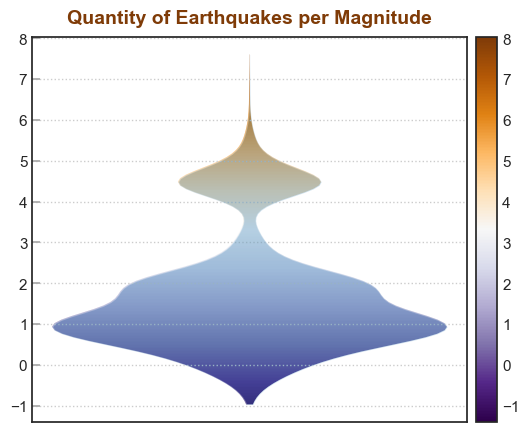

In [16]:
# -------------------------------------------
# Applying a gradient to the graph above and final details
# -------------------------------------------
# most of the code on this page I retrieved from overstack to see how to apply a gradient to the violin graph.
import matplotlib
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable


fig, md = plt.subplots(figsize=(6,5))

# creating a violin plot using magnitude data
violins = md.violinplot(earthquake_mag_iso['mag'], showmeans=False, showmedians=False, showextrema=False)

# remove the x values as they are not needed
plt.xticks([])
# increase the ammount of y values 
plt.yticks([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8])
md.tick_params('y', color='darkgrey')

# add a title
plt.title('Quantity of Earthquakes per Magnitude', pad=10, fontsize=14, weight='bold', color='#7f3b07')


ymin, ymax = md.get_ylim()
xmin, xmax = md.get_xlim()

# create a numpy image to use as a gradient
Nx,Ny=1,1000
# creates an array with 1000 rows and 1 column containing numbers from 0 to 1
imgArr = np.tile(np.linspace(0,1,Ny), (Nx,1)).T
# the name of the chosen colour map, the '_r' reverses the colours
cmap = 'PuOr_r'

# this is iterating through the entries in the graph and applying the colour map to them
for violin in violins['bodies']:
    path = Path(violin.get_paths()[0].vertices)
    patch = PathPatch(path, facecolor='none', edgecolor='none')
    md.add_patch(patch)
    img = md.imshow(imgArr, origin="lower", extent=[xmin,xmax,ymin,ymax], aspect="auto",
                    cmap=cmap,
                    clip_path=patch)

# colorbar
md_divider = make_axes_locatable(md)
cax = md_divider.append_axes("right", size="5%", pad="2%")
norm = matplotlib.colors.Normalize(vmin=ymin, vmax=ymax)
cb = matplotlib.colorbar.ColorbarBase(cax, cmap=matplotlib.cm.get_cmap(cmap), norm=norm, orientation='vertical')


# increase the amount of y axis numbers in the colorbar
plt.yticks(np.arange(-1, 9, 1))



In [ ]:
#-------------------------------------------
# Lets focus on the highest magnitude earthquakes
#-------------------------------------------
# lets view the mag column data again 
# the highest recorded magnitude is 7.6 which out of 10 is pretty high
earthquake_mag_iso['mag'].describe()

# lets reorder my table by magnitude
earthquake_mag_iso = earthquake_mag_iso.sort_values(by=['mag'], ascending=False)

# lets see the top 10 highest magnitude earthquakes
earthquake_mag_iso.head(10)

# lets see all mag values from 6 and above
earthquake_mag_iso[earthquake_mag_iso['mag'] >= 6]

#display specific columns
#location relevant columns
earthquake_mag_iso[['locationSource','mag','place','longitude','latitude','gap','horizontalError','nst', 'status']].head(11)
#depth relevant columns
earthquake_mag_iso[['locationSource','mag','gap','dmin','depthError']].head(11)

,locationSource,mag,gap,dmin,depthError
8038,us,7.6,69.0,2.037,3.034
9845,us,7.0,45.0,2.977,1.934
8674,us,6.9,24.0,0.403,1.594
7049,us,6.8,53.0,2.085,3.245
4613,us,6.5,37.0,10.983,1.683
8945,us,6.5,37.0,0.409,1.543
6443,us,6.2,20.0,1.683,3.877
924,us,6.2,82.0,11.523,1.860
6409,us,6.1,49.0,1.588,1.726
7664,us,6.0,52.0,5.141,1.770
